# Project 1: Ames Housing EDA Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To create a regression based model to predict the **housing price using the Ames Housing Dataset**.

[Link to data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Executive Summary

Backstory behind the Ames housing data set


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [589]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [590]:
# Set the graph style
plt.style.use('fivethirtyeight')

In [591]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [592]:
# Open the zzx CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [593]:
# View first 10 rows
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [594]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Data Description

Answer: 

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

In [595]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [596]:
dict_missing = pct_missing_value(train_df,['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

{'Pool QC': 99.56,
 'Misc Feature': 96.83,
 'Alley': 93.17,
 'Fence': 80.5,
 'Fireplace Qu': 48.76,
 'Lot Frontage': 16.09,
 'Garage Yr Blt': 5.56,
 'Garage Finish': 5.56,
 'Garage Qual': 5.56,
 'Garage Cond': 5.56,
 'Garage Type': 5.51,
 'Bsmt Exposure': 2.83,
 'BsmtFin Type 2': 2.73,
 'BsmtFin Type 1': 2.68,
 'Bsmt Cond': 2.68,
 'Bsmt Qual': 2.68,
 'Mas Vnr Area': 1.07,
 'Mas Vnr Type': 1.07,
 'Bsmt Half Bath': 0.1,
 'Bsmt Full Bath': 0.1}

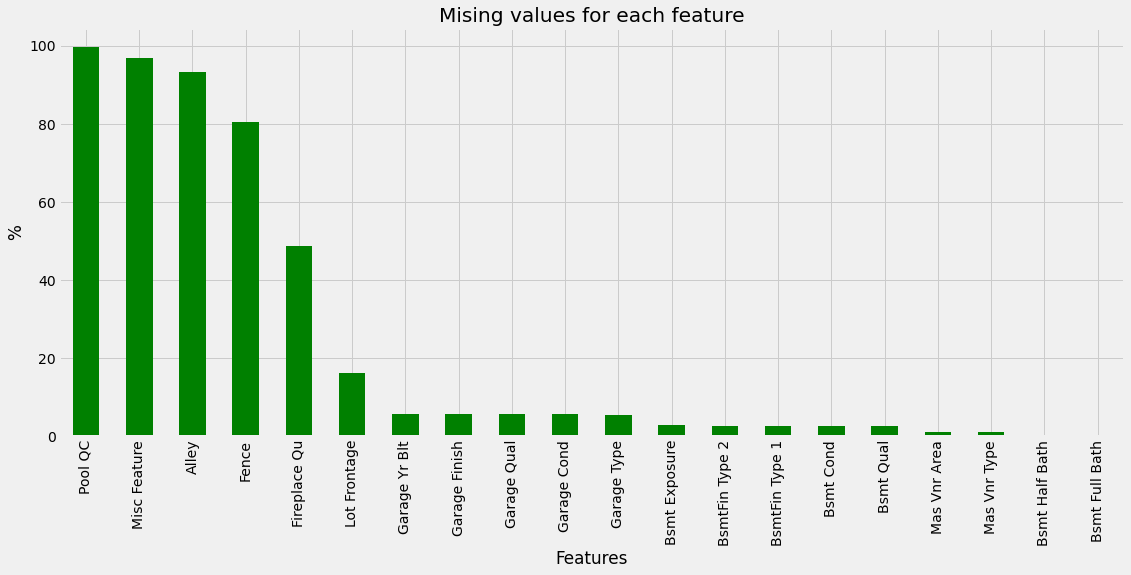

In [597]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17,7), color='green', 
                      title='Mising values for each feature', xlabel='Features', ylabel='%');

Top missing values in the data set, **drop the columns with percentages greater than 80%**

These features need to be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence'

In [598]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [599]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [600]:
# Will use Id as reference when merging data frames 
train_df_id = train_df['Id'].copy()
train_df_id

0        109
1        544
2        153
3        318
4        255
        ... 
2046    1587
2047     785
2048     916
2049     639
2050      10
Name: Id, Length: 2051, dtype: int64

In [601]:
# Columns to drop: 'PID', no correlation with price
# Will use Id as reference when merging data frames 

train_df = train_df.drop(['Id','PID'], axis=1) 
train_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


### Selecting the numeric variables

In [602]:
# Select the numeric variables with int64, float64

# Overall Qual, Overall Cond are ordinal variables in the train_df_num, will need to drop them and add to the train_df_cat

train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(['Overall Qual', 'Overall Cond'], axis=1).copy()
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


In [603]:
# Overall Qual, Overall Cond are ordinal variables

train_df_num_overall_qual_cond = train_df[['Overall Qual', 'Overall Cond']]

### Selecting the categorical variables

In [604]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


In [605]:
# Not required as adding them back to the numeric variables
# Concatenating the train_df_num_ord with train_df_cat
# train_df_cat = pd.concat([train_df_cat, train_df_num_ord], axis=1)
# train_df_cat.head()

### Cleaning the train_df_num

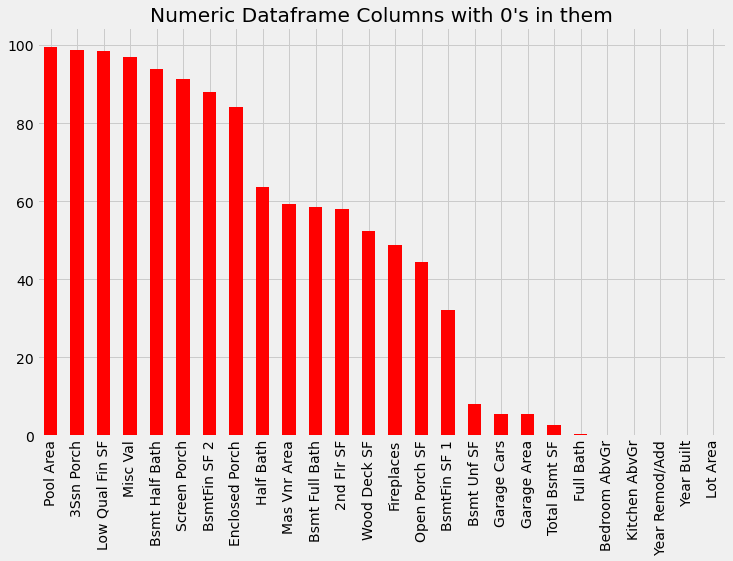

In [606]:
# Count the columns with values with 0's in them
train_df_with_0 = (((train_df_num.isin([0]).sum() / len(train_df_num)) * 100).sort_values(ascending=False)).iloc[:-9]

train_df_with_0.sort_values(ascending=False).plot(kind='bar', 
                                                  figsize=(11,7), title='Numeric Dataframe Columns with 0\'s in them', color='red');

In [607]:
train_df_with_0

Pool Area          99.561190
3Ssn Porch         98.732326
Low Qual Fin SF    98.391029
Misc Val           96.830814
Bsmt Half Bath     93.759142
Screen Porch       91.175037
BsmtFin SF 2       87.908337
Enclosed Porch     84.056558
Half Bath          63.773769
Mas Vnr Area       59.288152
Bsmt Full Bath     58.508045
2nd Flr SF         58.069235
Wood Deck SF       52.413457
Fireplaces         48.756704
Open Porch SF      44.466114
BsmtFin SF 1       32.033155
Bsmt Unf SF         8.044856
Garage Cars         5.509508
Garage Area         5.509508
Total Bsmt SF       2.632862
Full Bath           0.390054
Bedroom AbvGr       0.243784
Kitchen AbvGr       0.097513
Year Built          0.000000
Year Remod/Add      0.000000
Lot Area            0.000000
dtype: float64

In [608]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

,Pool Area,3Ssn Porch,Low Qual Fin SF,Misc Val,Bsmt Half Bath,Screen Porch,BsmtFin SF 2,Enclosed Porch,Half Bath,Mas Vnr Area,Bsmt Full Bath,2nd Flr SF,Wood Deck SF,Fireplaces,Open Porch SF,BsmtFin SF 1,Bsmt Unf SF,Garage Cars,Garage Area,Total Bsmt SF,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Year Built,Year Remod/Add,Lot Area,SalePrice
0,0,0,0,0,0.0,0,0.0,0,1,289.0,0.0,754,0,0,44,533.0,192.0,2.0,475.0,725.0,2,3,1,1976,2005,13517,130500
1,0,0,0,0,0.0,0,0.0,0,1,132.0,1.0,1209,0,1,74,637.0,276.0,2.0,559.0,913.0,2,4,1,1996,1997,11492,220000
2,0,0,0,0,0.0,0,0.0,0,0,0.0,1.0,0,0,0,52,731.0,326.0,1.0,246.0,1057.0,1,3,1,1953,2007,7922,109000
3,0,0,0,0,0.0,0,0.0,0,1,0.0,0.0,700,100,0,0,0.0,384.0,2.0,400.0,384.0,2,3,1,2006,2007,9802,174000
4,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,614,0,0,59,0.0,676.0,2.0,484.0,676.0,2,3,1,1900,1993,14235,138500


In [712]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

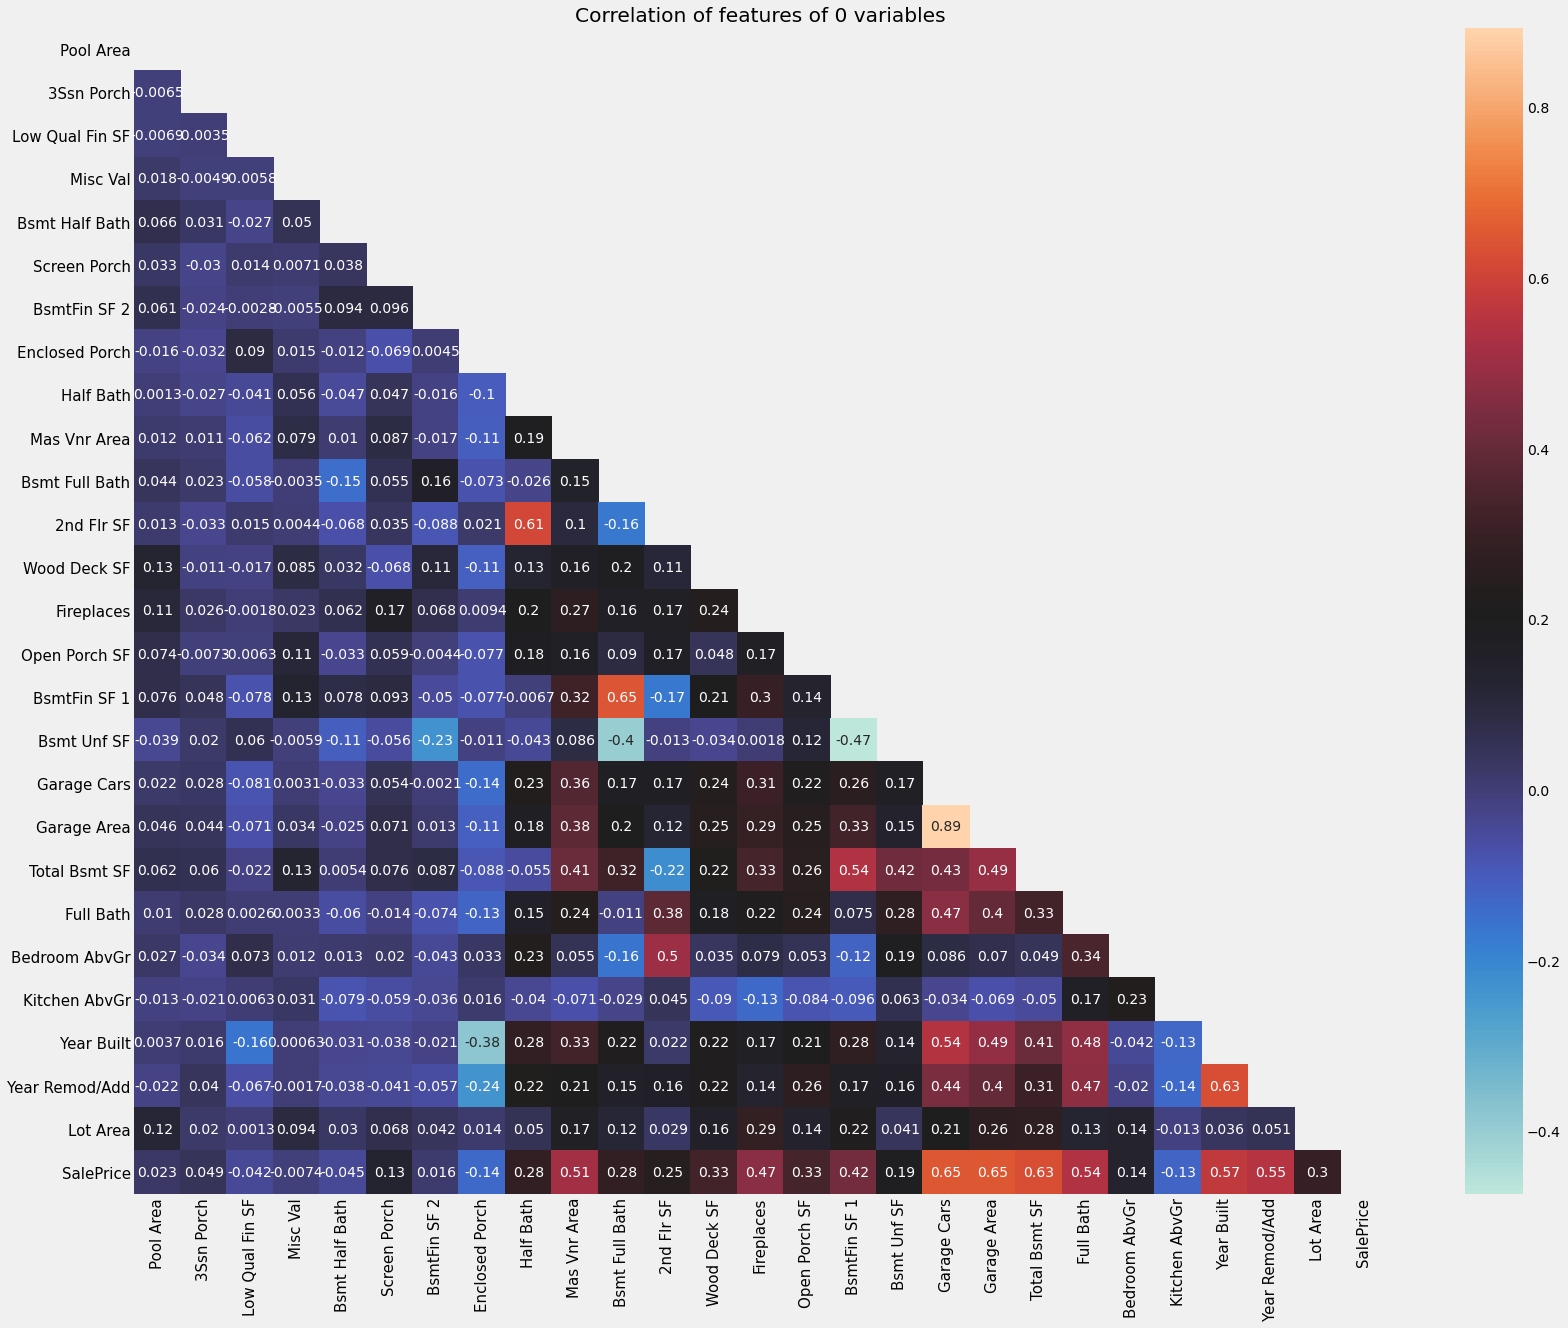

In [718]:
# Heatmap correlation of columns with 0's with SalePrice

corr_heatmap(train_df_with_0, '0', 'icefire')

In [714]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

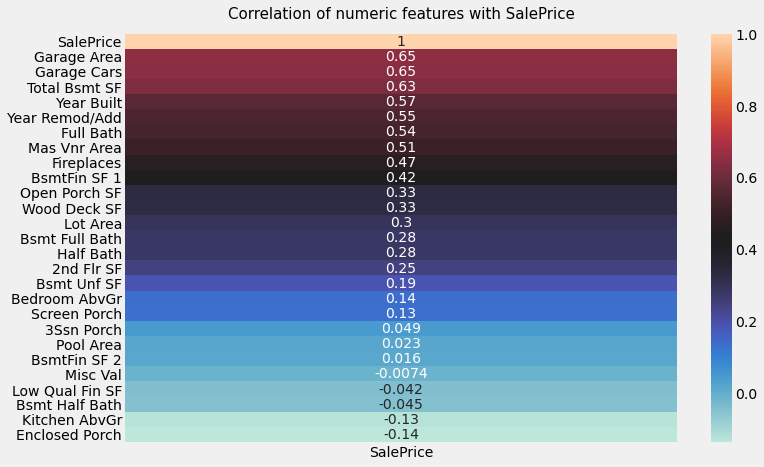

In [719]:
single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [612]:
train_df_with_0.columns

Index(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Year Built',
       'Year Remod/Add', 'Lot Area', 'SalePrice'],
      dtype='object')

Based on the correlation heatmap, the following numeric columns with a lot of 0's in them have **very little correlation with price**:
* Pool Area (99.5%, 0.023)
* 3Ssn Porch (98.7%, 0.049)
* Low Qual Fin SF (98.39%, -0.042)
* Misc Val (96.83%, -0.0074)
* Bsmt Half Bath (93.7%, -0.045)
* Screen Porch (91.17%, 0.13)
* BsmtFin SF 2 (87.9%, 0.016)
* Enclosed Porch (84.05%, -0.14)
* Bsmt Unf SF (8.04%, 0.19)

**These features will be dropped in train_df_num**

In [613]:
# Drop the numeric columns with the most 0's and with the least correlation
train_df_num = train_df_num.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Bsmt Unf SF'], axis=1)
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,3,2010,138500


In [614]:
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,3,2010,138500


### Drop the outliers with square feet of over 4000

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

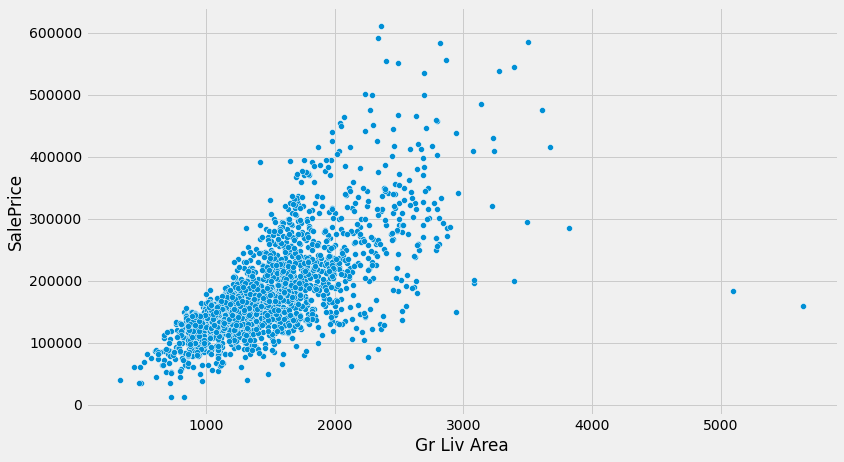

In [615]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train_df_num)

In [616]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['Gr Liv Area'][train_df['Gr Liv Area'] > 4000]

960     5642
1885    5095
Name: Gr Liv Area, dtype: int64

In [617]:
# Drop the outliers
train_df_num = train_df_num.drop(index=[960, 1995])
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,3,2010,138500


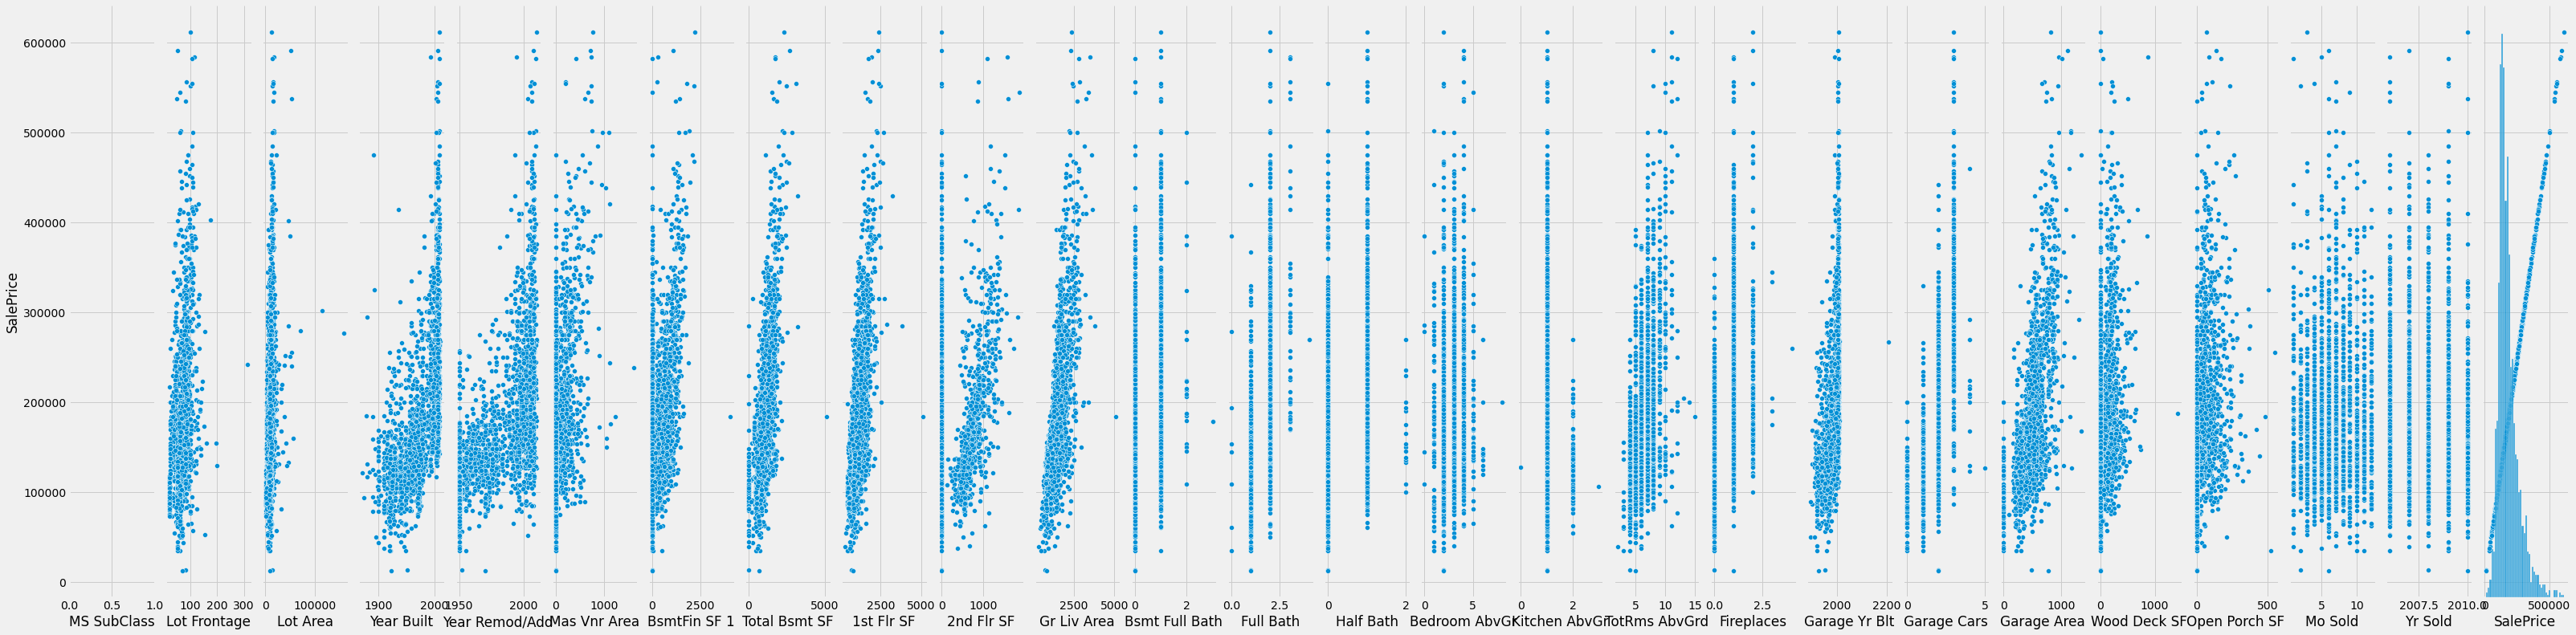

In [618]:
# Showing the scatterplot against Sale Price for all numeric variables
# plt.figure(figsize=(25,25))
g = sns.pairplot(data=train_df_num, y_vars='SalePrice')
g.fig.set_size_inches(45,15)

In [619]:
# Plot the heatmap of the numeric variables
# plt.figure(figsize=(11,7))
# sns.heatmap(data=train_df_num.corr()['SalePrice'],annot=True, cmap='viridis')

train_df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
Gr Liv Area       0.709980
Garage Area       0.653806
Total Bsmt SF     0.650814
Garage Cars       0.648127
1st Flr SF        0.631898
Year Built        0.572207
Year Remod/Add    0.550494
Full Bath         0.537946
Garage Yr Blt     0.534176
Mas Vnr Area      0.514663
TotRms AbvGrd     0.505866
Fireplaces        0.473030
BsmtFin SF 1      0.438625
Lot Frontage      0.354778
Open Porch SF     0.334857
Wood Deck SF      0.326474
Lot Area          0.302216
Bsmt Full Bath    0.284436
Half Bath         0.283047
2nd Flr SF        0.248521
Bedroom AbvGr     0.136706
Mo Sold           0.032811
Yr Sold          -0.014773
MS SubClass      -0.087745
Kitchen AbvGr    -0.125591
Name: SalePrice, dtype: float64

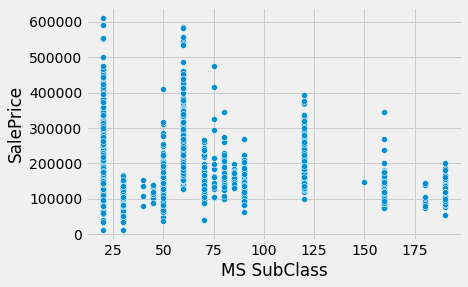

In [620]:
sns.scatterplot(x='MS SubClass', y='SalePrice', data=train_df_num);

From the following scatterplot and correlations, there's very little correlation for **MS SubClass and Kitchen AbvGr**. Will drop them.

<AxesSubplot:xlabel='MS SubClass', ylabel='SalePrice'>

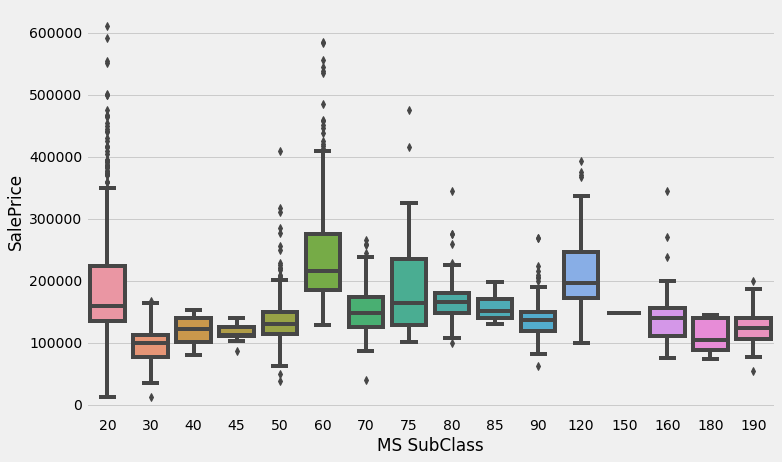

In [621]:
plt.figure(figsize=(11,7))
sns.boxplot(x='MS SubClass', y='SalePrice', data=train_df_num)

<AxesSubplot:xlabel='Kitchen AbvGr', ylabel='SalePrice'>

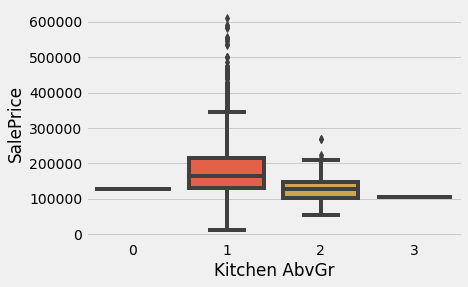

In [622]:
sns.boxplot(x='Kitchen AbvGr', y='SalePrice', data=train_df_num)

In [623]:
train_df_num = train_df_num.drop(['MS SubClass', 'Kitchen AbvGr'], axis=1)
train_df_num.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,3,2010,130500
1,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,4,2009,220000
2,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,1,2010,109000
3,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,4,2010,174000
4,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,3,2010,138500


In [624]:
train_df_num.drop('SalePrice', axis=1, inplace=True)

In [625]:
# Missing values in train_df_num
train_df_num.isnull().sum().sort_values(ascending=False) / len(train_df_num.isnull().sum().sort_values(ascending=False))

Lot Frontage      14.347826
Garage Yr Blt      4.956522
Mas Vnr Area       0.956522
Bsmt Full Bath     0.086957
Garage Area        0.043478
Garage Cars        0.043478
BsmtFin SF 1       0.043478
Total Bsmt SF      0.043478
2nd Flr SF         0.000000
Lot Area           0.000000
Year Built         0.000000
Year Remod/Add     0.000000
1st Flr SF         0.000000
Yr Sold            0.000000
Gr Liv Area        0.000000
Mo Sold            0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
TotRms AbvGrd      0.000000
Fireplaces         0.000000
Wood Deck SF       0.000000
Open Porch SF      0.000000
Full Bath          0.000000
dtype: float64

In [626]:
# Mode of train_df_num for the missing values in the columns
mode_values = train_df_num[['Garage Yr Blt', 'Bsmt Full Bath', 'Garage Cars',]].mode()
mode_values

,Garage Yr Blt,Bsmt Full Bath,Garage Cars
0,2005.0,0.0,2.0


In [627]:
# Mean of train_df_num for the missing values in the columns
mean_values = dict(train_df_num[['Lot Frontage','Mas Vnr Area', 'Garage Area', 'BsmtFin SF 1','Total Bsmt SF']].mean())
mean_values

{'Lot Frontage': 68.91855730075625,
 'Mas Vnr Area': 99.40157868771584,
 'Garage Area': 473.29150390625,
 'BsmtFin SF 1': 439.9765625,
 'Total Bsmt SF': 1055.60107421875}

In [628]:
def agg_dict(dataframe):
    '''
    Creates a dictionary of the aggregated dataframe function
    '''
    new_dict = {}
    for index, key in enumerate(mode_values.keys()):
        new_dict[key] = mode_values.values.tolist().pop()[index]
    return new_dict

agg_dict(mode_values)

{'Garage Yr Blt': 2005.0, 'Bsmt Full Bath': 0.0, 'Garage Cars': 2.0}

In [629]:
train_df_num = train_df_num.fillna(agg_dict(mode_values)) # Fill the nulls values of the train_df_num with the mode values
train_df_num = train_df_num.fillna(mean_values) # Fill the nulls values of the train_df_num with the mean values
train_df_num.isnull().sum().sort_values(ascending=False)

Yr Sold           0
Bsmt Full Bath    0
Lot Area          0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Full Bath         0
Mo Sold           0
Half Bath         0
Bedroom AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
Lot Frontage      0
dtype: int64

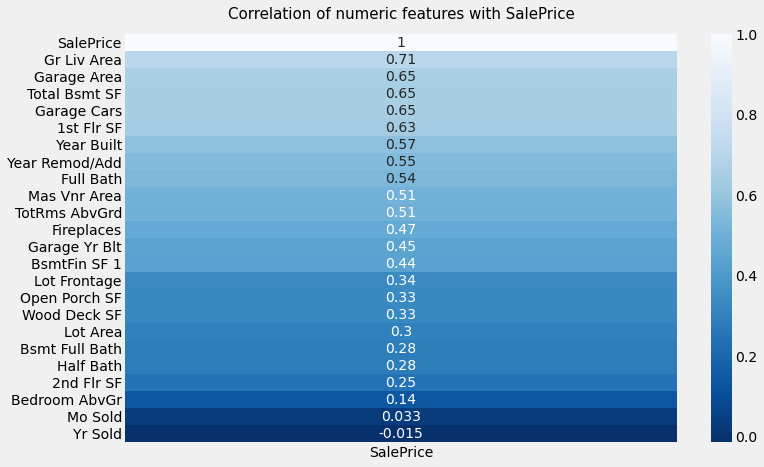

In [692]:
train_df_num_corr = pd.concat([train_df_num, train_df['SalePrice']], axis=1)

single_corr_heatmap(train_df_num_corr, ['SalePrice'], 'Blues_r')

In [631]:
train_df_num[['Mo Sold', 'Yr Sold']]

,Mo Sold,Yr Sold
0,3,2010
1,4,2009
2,1,2010
3,4,2010
4,3,2010
...,...,...
2046,1,2008
2047,3,2009
2048,3,2009
2049,11,2009


### EDA on Categorical Variables

In [632]:
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


In [633]:
train_df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

For train_df_cat,

**Nominal variables:**
* Ms Zoning
* Street (Gravel or Pavel) (Change to 0,1)
* Land Contour
* Lot Config
* Neighbourhood
* Condition 1 and Condition 2 (Proxmity to various locations)
* Bldg Type (Type of dwelling)
* House style (Type of dwelling)
* Roof Style
* Roof Matl
* Exterior 1st and Exterior 2nd
* Mas Vnr Type
* Foundation 
* Heating
* Central Air (Change to 0,1)
* Garage Type
* Sale Type


**Ordinal variables:**
* Lot Shape (Regular, slightly irregular ..)
* Utilities
* Land Slope (Gentle, moderate .. slope)
* Exter Qual (quality of the material on the exterior)
* Exter Cond (present condition of the material on the exterior)
* Bsmt Qual (height of the basement)
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* HeatingQC
* Electrical
 * SBrkr	Standard Circuit Breakers & Romex,  (5)
 * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	 (4)
 * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (3)
 * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (2)
 * Mix	Mixed (1)
* KitchenQual
* Functional (Home functionality)
* Garage Cond
* Paved Drive

In [634]:
train_df_cat_null_pct = ((train_df_cat.isnull().sum() / len(train_df_cat)).sort_values(ascending=False) * 100).head(11)
train_df_cat_null_pct

Fireplace Qu      48.756704
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Type       1.072647
dtype: float64

In [635]:
cat_null = train_df_cat_null_pct.index.tolist()
cat_null

['Fireplace Qu',
 'Garage Cond',
 'Garage Qual',
 'Garage Finish',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'Bsmt Cond',
 'Bsmt Qual',
 'BsmtFin Type 1',
 'Mas Vnr Type']

<AxesSubplot:title={'center':'Null values for each variable as a percentage'}, xlabel='Variables', ylabel='% format'>

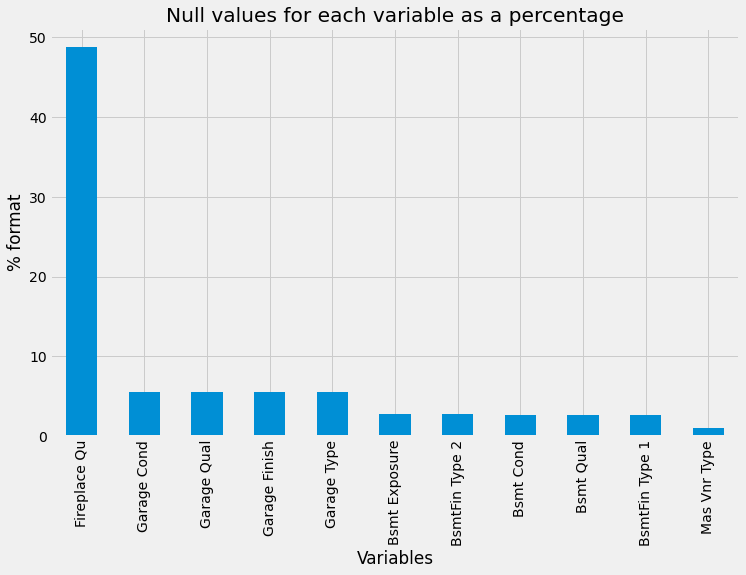

In [636]:
train_df_cat_null_pct.plot(kind='bar', figsize=(11,7),
                           title='Null values for each variable as a percentage',xlabel='Variables', ylabel='% format')

In [637]:
# Mode of the columns with null values
mode_values = train_df_cat[cat_null].mode()
mode_values

,Fireplace Qu,Garage Cond,Garage Qual,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,Bsmt Cond,Bsmt Qual,BsmtFin Type 1,Mas Vnr Type
0,Gd,TA,TA,Unf,Attchd,No,Unf,TA,TA,GLQ,None


In [638]:
# Fill the null values with the mode of each column
train_df_cat = train_df_cat.fillna(agg_dict(mode_values))
train_df_cat.isnull().sum().sort_values(ascending=False)

Sale Type         0
Condition 2       0
Mas Vnr Type      0
Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
Roof Style        0
House Style       0
Bldg Type         0
Condition 1       0
Paved Drive       0
Neighborhood      0
Land Slope        0
Lot Config        0
Utilities         0
Land Contour      0
Lot Shape         0
Street            0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Garage Cond       0
Garage Qual       0
Garage Finish     0
Garage Type       0
Fireplace Qu      0
Functional        0
Kitchen Qual      0
Electrical        0
Central Air       0
Heating QC        0
Heating           0
BsmtFin Type 2    0
BsmtFin Type 1    0
Bsmt Exposure     0
Bsmt Cond         0
MS Zoning         0
dtype: int64

### Need to split between Nominal and Ordinal variables into their dataframes

The Nominal variables will have one hot encoding while the Ordinal variables will have ordinal encoding

In [639]:
# Nominal variables
train_df_cat_nominal = train_df_cat[[
    'MS Zoning',
    'Street', 
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Sale Type',
]]

train_df_cat_nominal.head()

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type
0,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD


In [640]:
# Oridinal variables 
train_df_cat_ord = train_df_cat[[col for col in train_df_cat.columns if col not in train_df_cat_nominal.columns]].copy()
train_df_cat_ord.head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,Gd,RFn,TA,TA,Y
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,Gd,Fin,TA,TA,Y
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,Gd,Unf,TA,TA,N


In [641]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_df_cat_ord_encoded = ordinal_encoder.fit_transform(train_df_cat_ord)
train_df_cat_ord = pd.DataFrame(train_df_cat_ord_encoded, columns=train_df_cat_ord.columns.tolist())

In [642]:
train_df_cat_ord.head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive
0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0
1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0
2,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0
3,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0
4,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0


In [643]:
ordinal_encoder.categories_

[array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Av', 'Gd', 'Mn', 'No'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ'],
       dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Fin', 'RFn', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=o

In [644]:
# Add back the Overall Qual ,Overall Cond, SalePrice
train_df_cat_ord = pd.concat([train_df_cat_ord,train_df[['Overall Qual' ,'Overall Cond', 'SalePrice']].astype('float')], axis=1)
train_df_cat_ord.head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Overall Qual,Overall Cond,SalePrice
0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0,130500.0
1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0,220000.0
2,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0,109000.0
3,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0,174000.0
4,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0,138500.0


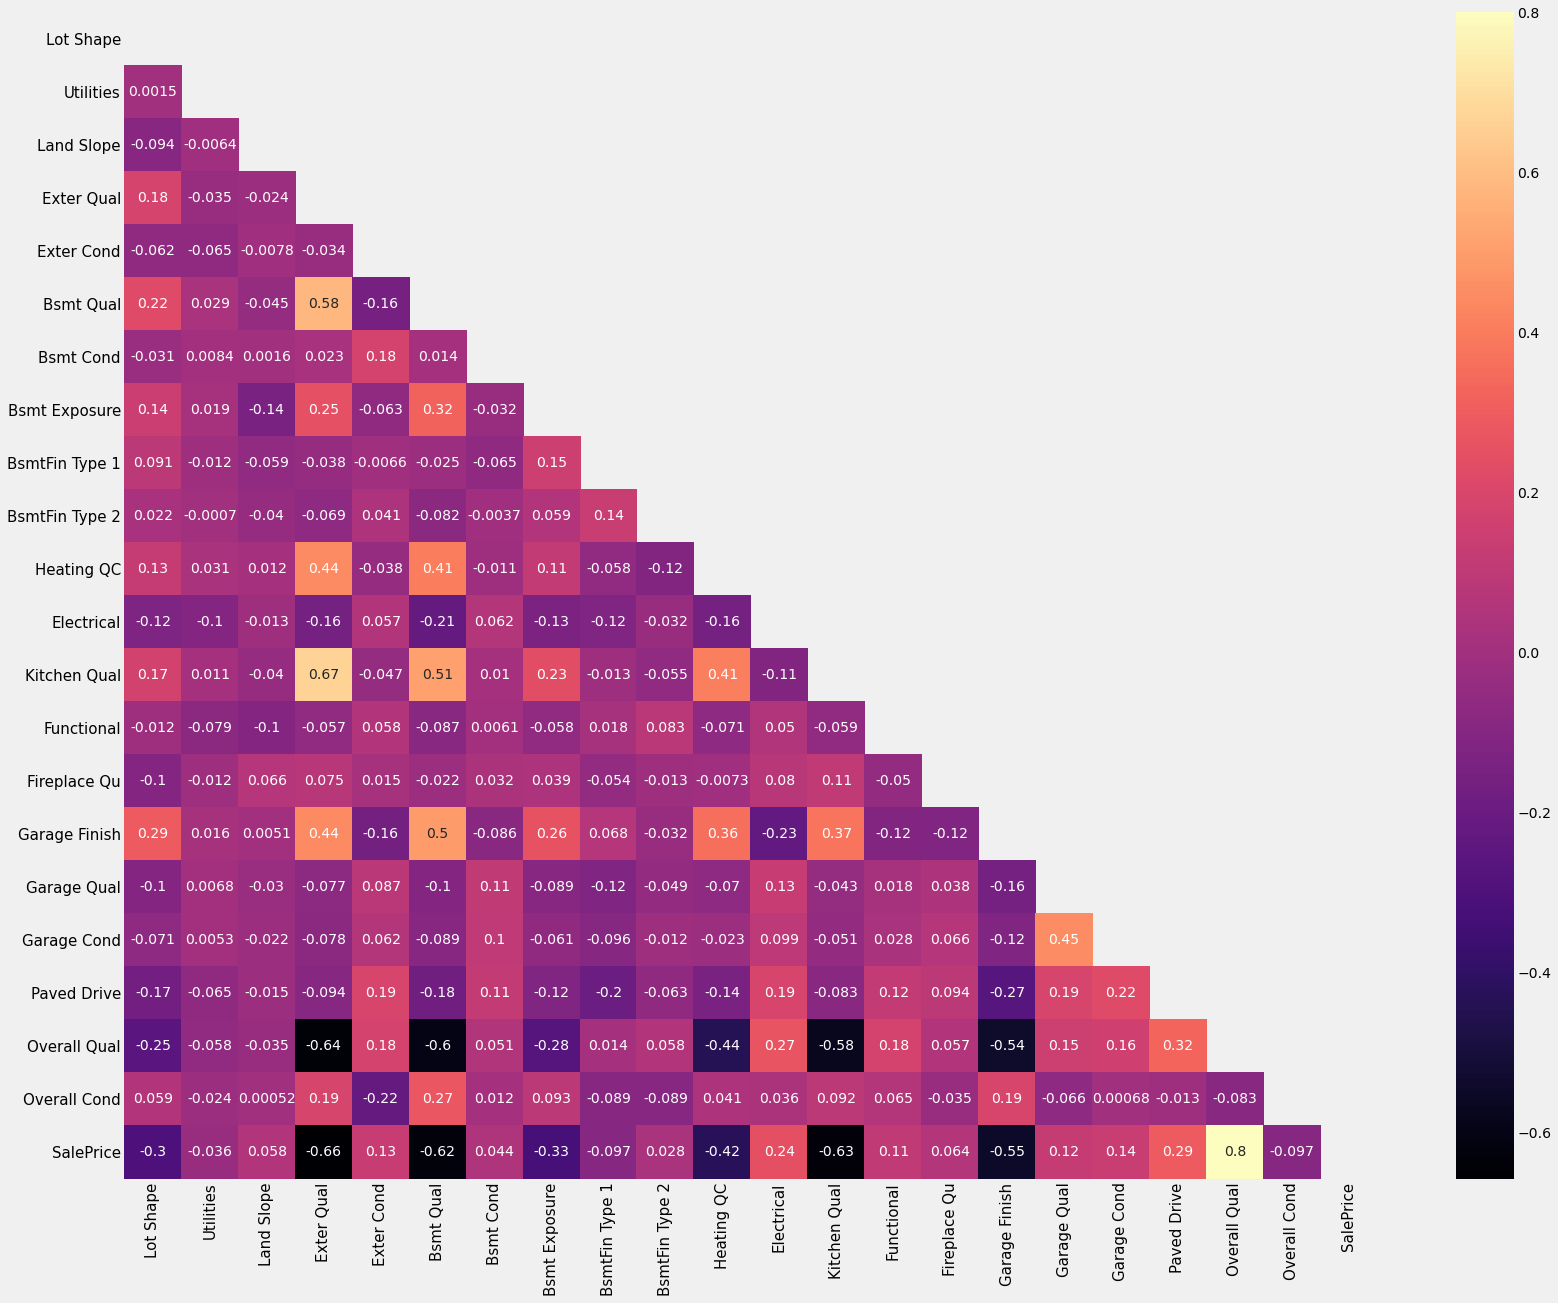

In [708]:
# Plotting the heatmap for train_df_cat_ord
corr_heatmap(train_df_cat_ord, 'magma')

In [716]:
train_df_cat_ord.head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Overall Qual,Overall Cond,SalePrice
0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0,130500.0
1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0,220000.0
2,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0,109000.0
3,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0,174000.0
4,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0,138500.0


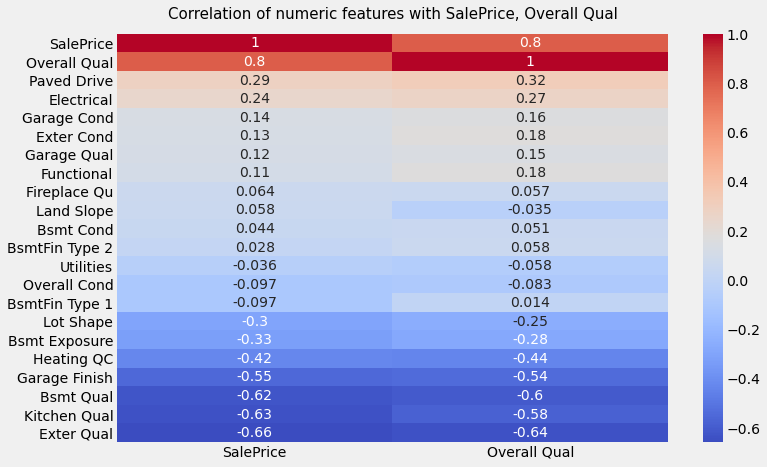

In [698]:
# plt.figure(figsize=(7,6))
# sns.heatmap(pd.DataFrame(train_df_cat_ord.corr()['SalePrice']).sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', lw=0)
# plt.title('Correlation of ordinal variables with SalePrice', pad=15)

single_corr_heatmap(train_df_cat_ord, ['SalePrice','Overall Qual'], 'coolwarm')

In [647]:
pd.DataFrame(train_df_cat_ord.corr()['SalePrice']).sort_values('SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Paved Drive,0.290472
Electrical,0.244669
Garage Cond,0.137472
Exter Cond,0.129236
Garage Qual,0.123246
Functional,0.108460
Fireplace Qu,0.063790
Land Slope,0.057990


### Could potentially drop correlation values with features between 0.24 to -0.3.
### Feature engineer some of the variables

### Nominal Variables

In [648]:
train_df_cat_nominal.head()

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type
0,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD


In [649]:
# Checking for null values in train_df_cat_nominal
train_df_cat_nominal.isnull().sum()

MS Zoning       0
Street          0
Land Contour    0
Lot Config      0
Neighborhood    0
Condition 1     0
Condition 2     0
Bldg Type       0
House Style     0
Roof Style      0
Roof Matl       0
Exterior 1st    0
Exterior 2nd    0
Mas Vnr Type    0
Foundation      0
Heating         0
Central Air     0
Garage Type     0
Sale Type       0
dtype: int64

In [650]:
train_df_cat_dummy = pd.get_dummies(train_df_cat_nominal, drop_first=True)
train_df_cat_dummy
# plt.figure(figsize=(20,20))
# sns.heatmap(train_df_cat_dummy.corr(),cmap='viridis')

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,...,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2047,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2048,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2049,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [654]:
# Nominal variables transformed to dummy variables
train_df_cat_dummy.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,...,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [652]:
# Ordinal variables
train_df_cat_ord.head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Overall Qual,Overall Cond,SalePrice
0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0,130500.0
1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0,220000.0
2,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0,109000.0
3,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0,174000.0
4,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0,138500.0


In [653]:
# Numeric variables
train_df_num.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,68.918557,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,3,2010
1,43.000000,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,4,2009
2,68.000000,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,1,2010
3,73.000000,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,4,2010
4,82.000000,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,3,2010


## Variable Minimum scores and maximum scores

In [ ]:
train_df.describe()

The minimum and maximum scores for ERW is correct.

The minimum score for sat_2017 math is 52, but the range is between 468 ~ 651, based on the pdf file the **correct value should be 524**.

In [ ]:
sat_2017['Math'].describe()

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [ ]:
#code
sat_2017.info()

In [ ]:
act_2017.info()

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

For xxx, participation should be a float type not object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

### Standardize the attributes for train_df_with_0

In [283]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_df_num_scaled = scaler.fit_transform(train_df_with_0)
# train_df_num_with_0 = pd.DataFrame(train_df_num_scaled, columns=[train_df_with_0.columns])
# train_df_num_with_0.head()

## Transforming xxx attribute into xxx type

In [ ]:
#code
# sat_2017['Participation'] = sat_2017['Participation'].apply(lambda i:float(i.replace('%','')))
# sat_2017['Participation']

In [ ]:
sat_2017['Participation'].dtype

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [ ]:
#Code:
xxx.info()

In [ ]:
xxx.info()

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

## Changing the column names for xxx

Change them to sat_17_participation, sat_17_evidenced_based_reading_writing, sat_17_math, sat_17_total

First change all to lower case

In [ ]:
#code
# sat_2017 = sat_2017.rename(str.lower, axis='columns')
# sat_2017.head()

In [ ]:
xxx.columns

In [ ]:
# sat_2017 = sat_2017.rename(columns={k:"sat_17_"+k for k in sat_2017.columns[1:]}) # Run once only, if not it'll duplicate
# sat_2017.head()

In [ ]:
# sat_2017 = sat_2017.rename(columns={"sat_17_evidence-based reading and writing": "sat_17_erw"})
# sat_2017.head()

In [ ]:
act_2017 = act_2017.rename(str.lower, axis='columns')
act_2017.head()

In [ ]:
act_2017 = act_2017.rename(columns={k:"act_17_"+k for k in act_2017.columns[1:]})
act_2017.head()

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_17_participation|float|SAT|State participation rate in 2017|
|sat_17_erw|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|SAT|State average Math score in 2017|
|sat_17_total|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_17_participation|float|ACT|State participation rate in 2017|
|act_17_english|float|ACT|State average English score in 2017|
|act_17_math|float|ACT|State average Math score in 2017|
|act_17_reading|float|ACT|State average Reading score in 2017|
|act_17_science|float|ACT|State average Science score in 2017|
|act_17_composite|float|ACT|State average Composite score in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [ ]:
# Need to remove index 0 as it's the national aggregate
act_2017.head()

In [ ]:
act_2017 = act_2017.drop(0, axis='index')
act_2017.head()

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [ ]:
#Code:
combined_2017 = sat_2017.merge(act_2017,on='state')
combined_2017.head()

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [ ]:
#code
# combined_2017.to_csv('../data/combined_2017.csv')

In [ ]:
def add_underscore_char(words,test_name='test'):
    '''
    This function will covert the strings to lower case and add the test and year
    names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
            if lst[0] == 'percentage':
                new_dict[word] = test_name + "participation"
            elif lst[0] == 'average':
                new_dict[word] = test_name + lst[1]
            else:
                new_dict[word] = test_name+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
add_underscore_char(act_2018.columns,"act_18_")

In [ ]:
final_sat_act.to_csv('../data/final.csv')

Update the data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final.csv|State of the data| 
|sat_17_participation|float|final.csv|State participation rate in 2017|
|sat_17_erw|integer|final.csv|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|final.csv|State average Math score in 2017|
|sat_17_total|integer|final.csv|State average Total score in 2017|
|act_17_participation|float|final.csv|State participation rate in 2017|
|act_17_english|float|final.csv|State average English score in 2017|
|act_17_math|float|final.csv|State average Math score in 2017|
|act_17_reading|float|final.csv|State average Reading score in 2017|
|act_17_science|float|final.csv|State average Science score in 2017|
|act_17_composite|float|final.csv|State average Composite score in 2017|
|sat_18_participation|float|final.csv|State participation rate in 2018|
|sat_18_erw|integer|final.csv|State average Evidence-Based Reading and Writing score in 2018|
|sat_18_math|integer|final.csv|State average Math score in 2018|
|sat_18_total|integer|final.csv|State average Total score in 2018|
|act_18_participation|float|final.csv|State participation rate in 2018|
|act_18_english|float|final.csv|State average English score in 2018|
|act_18_math|float|final.csv|State average Math score in 2018|
|act_18_reading|float|final.csv|State average Reading score in 2018|
|act_18_science|float|final.csv|State average Science score in 2018|
|act_18_composite|float|final.csv|State average Composite score in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [ ]:
final_sat_act.describe().T

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## In Summary

**SAT tests**

The participation rate for SAT increases significantly for **Colorado** from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT.

The other states do not differ as much.

**Illinois** has a large increase in SAT participation with a 1000% increase in sat participation from 2017 to 2018


**ACT tests**

**Colorado** faced the biggest decline in participation rates of act 100% in 2017 to 30% in 2018.

Largest increase in participation rate for **Ohio** with about 33% increase in participation rates


**Do any states show have >50% participation on both tests either year?**

Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
# mask = np.zeros_like(df.corr())
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(20,9))
# sns.heatmap(df.corr(),cmap='viridis',annot=True, mask = mask, annot_kws={'size':12})
# plt.title('Correlation between xxx and yyy attributes', fontsize=25)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

From the heatmap, there's high negative correlation between SAT and ACT participation rate with -84% in 2017 and -85% in 2018. This translates to states with high SAT participation rates are more likely to have low ACT participation rates, vice versa.

There's an interesting correlation between the score and participation rates. For SAT, the correlation between average total score and participation was -87% in 2017 and -79% in 2018. For ACT, the correlations were -86% in 2017 and -86% in 2018. This shows that the higher the participation, the lower the average total score. This is likely due to students who show greater interest taking the test in cases of low participation and the scores being lower for cases in high participation as the range of student skills become wider.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[i], ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('State Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Plotting the participation rates for SAT and ACT 2017 and 2018

In [ ]:
subplot_histograms(final_sat_act, ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], 'Participation rates', 
                   sup_title='SAT and ACT participation rate')

In [ ]:
final_sat_act[['act_17_participation', 'act_18_participation']].agg(['mean', 'median'])

Most of the participation rate is between **0-10%** for **SAT**.

There seems to be about **25%** increase in SAT participation from 2017 to 2018 judging from the *mean values*.

Participation rate for **ACT** is much higher compared to SAT. Also, the participation rates do not differ as much year to year.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

## SAT and ACT 2017 math scores

In [ ]:
lmplots(final_sat_act, 'sat_17_math', 'act_17_math', 
        'SAT and ACT 17 math scores', 'SAT 2017 math scores', 
        'ACT 2017 math scores')

The scatter points are dispersed and a negative line of best fit is plotted. This shows a negative weak correlation between the variables.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## SAT and ACT participation box plots

In [ ]:
def boxplots(dataframe, title, xlabel = None, yticklabels = None, palette='coolwarm'):    
    plt.figure(figsize=(11,7))
    sns.boxplot(data=dataframe, orient='h', palette=palette, width=0.5)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel(xlabel, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(ticks=[tick for tick in range(len(dataframe.columns))], labels= yticklabels, fontsize=15)
    plt.show()

In [ ]:
all_part = final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]
boxplots(all_part, 'Participation rates for SAT and ACT test', 'Participation rates in (%)', ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], palette='viridis')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my analysis, the three states that I've chosen to investigate Colorado, Illinois and Arkansas. Colorado's SAT participation rate has increased from 11% to 100% from 2017 to 2018 while their ACT participation rate has decreased from 100% to 30%. A similiar trend was found in Illinois where the participation rate has increased from 9% in 2017 to to 99% in 2018 while their ACT participation rate has decreased from 93% to 43%. Arkansas' participation rate for SAT remains the lowest year-to-year while their participation rate for ACT tests is one of the highest.

Colorado state officials switched from the mandatory ACT to the mandatory SAT which resulted in a decrease in ACT participation and an increase in SAT participation. The reason behind the switch is that the Colorado Department of Education (CDE) remarked the exam is more closely aligned to the state's academic standards and to prepare them for life after high school. (1) (2)

According to the Chicago Tribune, Illinois State Board of Education (ISBE) made the switch as well from ACT the SAT after weighing the attributes of both exams and decided SAT's standards was better aligned with Illinois. (3)

For both states, the average scores for SAT decreases significantly as a greater number of students took the test while the average scores for the ACT increased as a result of a smaller group of students taking it. For instance, Colorado's SAT scores went from 1201 in 2017 to 1025 in 2018 while the ACT average score went from 20.8 in 2017 to 23.9 in 2018.

In Arkansas, the ACT is used as an admission requirement to enter colleges or universities which is why there's a a very high participation rate for ACT and it's considered an "ACT state". (4) (5)

### References

* [Testive](https://www.testive.com/colorado-sat-change-2017/) (1) 

* [Chalkbeat](https://co.chalkbeat.org/2017/8/17/21100853/sat-scores-show-mixed-results-on-whether-colorado-juniors-are-on-track-for-college) (2)

* [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) (3)

* [University of Arkansas](https://admissions.uark.edu/apply/test-scores/index.php) (4)

* [Arkansas Department of Education](http://dese.ade.arkansas.gov/divisions/learning-services/assessment/the-act) (5)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.